In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("train.csv", encoding="utf-8")
test = pd.read_csv("test.csv", encoding="utf-8")
print(f"train: {train.shape}\ntest: {test.shape}")

train: (891, 12)
test: (418, 11)


# 특징 조사

In [4]:
train.info()
test.info()
# train에서는 Survived 확인할 수 있음 
# 타켓 변수 = Survived / trian을 통해 Survived를 학습시키고
# test에서 Survived가 없는 상태로 예측 -> 성능 평가

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [5]:
# 데이터 어떻게 생겼는지 확인 
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# 통계적 정보 확인
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


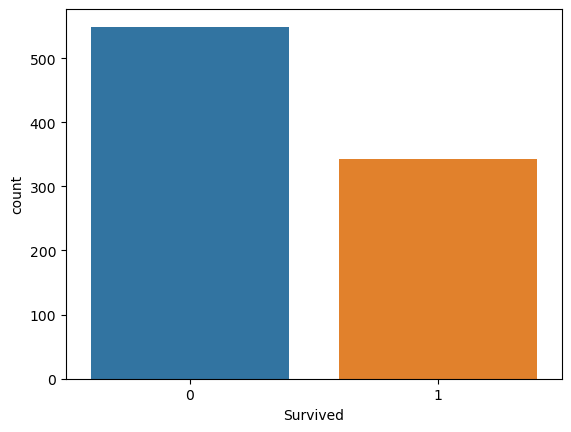

In [9]:
# Survived에 대한 시각화
survived=sns.countplot(x='Survived', data= train)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

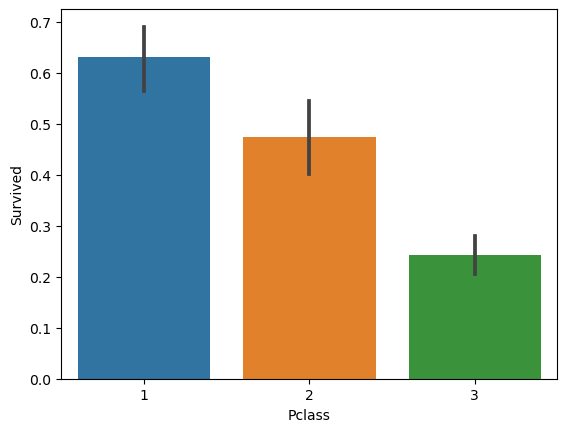

In [10]:
# 등급에 따른 생존율
sns.barplot(x='Pclass', y='Survived', data=train)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

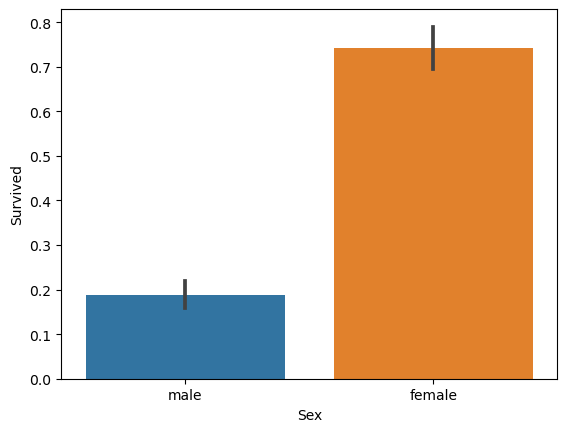

In [11]:
sns.barplot(x='Sex', y='Survived', data=train)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

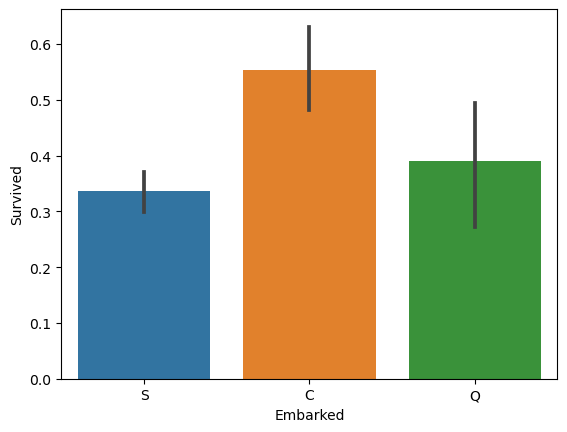

In [12]:
# 탑승항구 별 생존율
sns.barplot(x='Embarked', y='Survived', data=train)

<AxesSubplot:>

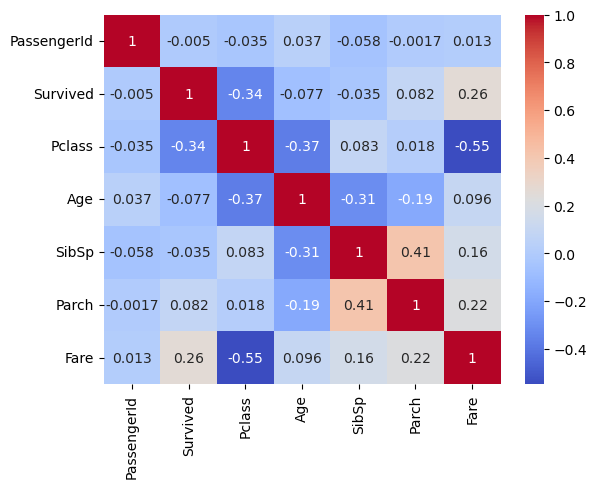

In [13]:
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
# 상관계수 : 두 변수간 관계를 수치화
# 양 : 서로가 같은 방향, 
# e.g. Fare가 Pclass가 양이면, 높은 요금 지불한 사람이 높은 클래스일 가능성이 크다.
# 음 : 서로 반대 방향
# e.g.낮은 클래스일수록 요금이 낮다.

# 0에 가까움 : 관계가 없다

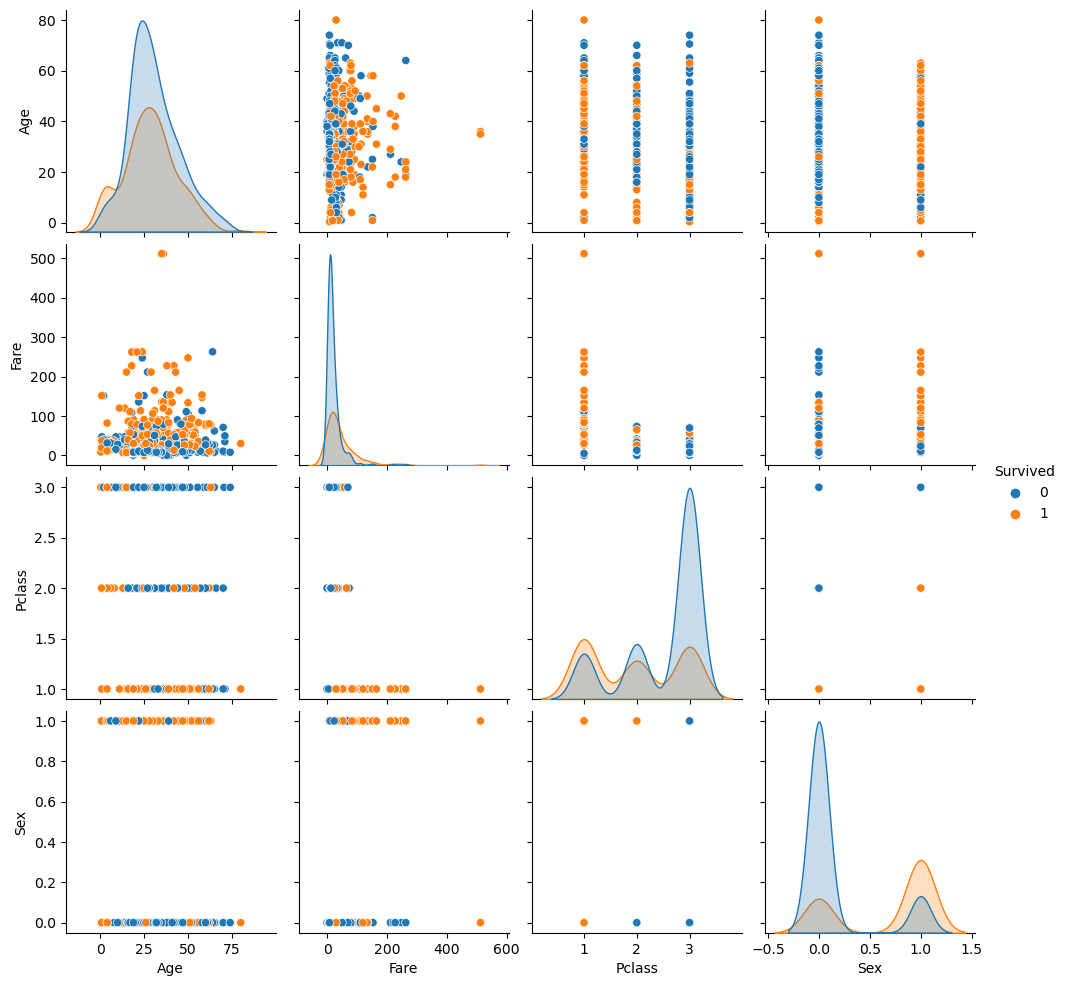

In [14]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
# 성별 : 범주형 -> 수치형 변수 : 레이블 인코딩

sns.pairplot(train, hue='Survived', vars=['Age', 'Fare', 'Pclass', 'Sex'])
# 나이, 지불 요금, 클래스, 성별로 구성됨

# 이름, SibSp(함께 탄 형제 or 배우자수), Parch(부모, 자식 수), Ticket(티켓번호), Embarked(탄 항구)
# 위와 같은 것과 생존율의 연관성을 찾기 어려움.

- Age - Fare<br>
낮은 요금을 낸 승객 중 일부 생존, 요금을 많이 낸 승객은 주로 1등석으로 생존 확률이 높음<br>
<br>
- Pclass - Fare<br>
낮은 등급일수록 요금이 저렴, 1등급일 수록 요금이 비쌈.
=> 1등급 승객은 Fare가 높고, Survived(생존자)도 상대적으로 많음<br>
<br>
- Age - Pclass<br>
나이가 낮을수록 낮은 등급을 탔음<br>
<br>
- Sex_num과 다른 변수들<br>
Survived의 차이가 명확하게 보임. 1(여성)이 더 높은 생존율을 가짐<br>
<br>

## 결론
- 여성(1)이 남성(0)에 비해 생존율이 높음
- 요금이 높아지면 높은 클래스에 해당하고, 생존율도 높아짐

=> 성별, 클래스, 요금이 중요한 feature이다

# 결측치 처리

In [15]:
train.isnull().sum()
# True = 값이 비었다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# Age:평균값으로 대체
train['Age'].fillna(train.groupby('Pclass')['Age'].transform('median'), inplace=True)

In [17]:
# Cabin: 객실 번호인데, 객실 번호는 Pclass와 생존율의 관계성을 보면 해결 될듯?
# 결측치 너무 많아서 뺐음

train.drop(columns=['Cabin'], inplace=True)

In [18]:
# Embarked: 탑승항구, 최빈값으로 대체
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [19]:
train.isnull().sum()
# 결측치 없음

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 원핫 인코딩

In [20]:
# 이미 위에서 성별은 레이블 인코딩으로 처리했고,
# Enbarked는 필요 없을거 같으니까 drop함
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)


In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1


# 이상치 처리

<br>
: 관측된 데이터의 범위에서 많이 벗어난 아주 작은 값<br>
마이클 조던

- 지금 나이, 성별, 요금, 클래스가 생존율과 관련이 있는 데이터인데, outlier가 생길 수 있는 데이터는 요금과 나이 정도.

<AxesSubplot:xlabel='Fare', ylabel='Age'>

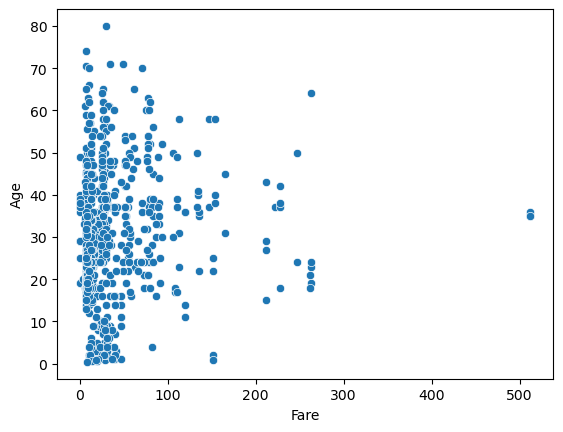

In [22]:
sns.scatterplot(x='Fare', y='Age', data=train)


In [23]:
Q1 = train['Fare'].quantile(0.25) # 1사분위수
Q3 = train['Fare'].quantile(0.75) # 3사분위수

IQR = Q3 - Q1 

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# 왜 1.5배냐, 이미 여러 연구와 실험을 통해 검증되었대

outliers = train[(train['Fare'] < lower_bound) | (train['Fare'] > upper_bound)]

# 이상치 제거
train = train[(train['Fare'] >= lower_bound) & (train['Fare'] <= upper_bound)]


<AxesSubplot:xlabel='Fare', ylabel='Age'>

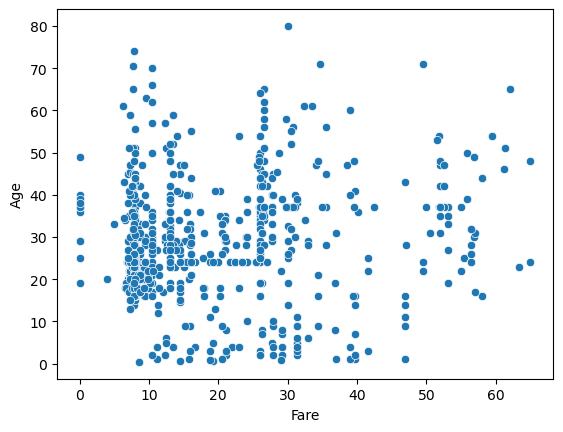

In [24]:
sns.scatterplot(x='Fare', y='Age', data=train)

# Train, Test 분리
- train : 학습할 데이터, Survived O
- test : 평가할 데이터, Survived X, 예측 데이터만 있음


In [25]:
#특징 찾을 때 발견한 타켓 변수(Survived)와 나머지 특징을 분리
X_train = train.drop(columns=['Survived']) # 나머지 특징
y_train = train['Survived'] # 타켓 변수

# 모델 사용

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [27]:
# test 데이터 전처리
X_test = test.drop(columns=['PassengerId'])  # 필요 시 PassengerId 열 제외

In [28]:
# 불필요한 열 제거
X_train = train.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'], errors='ignore')
X_test = test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], errors='ignore')

X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 이제 X_train_split에는 수치형 데이터만 남아 있을 거야
print(X_train_split.head())


     PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  \
147          148       3    1   9.0      2      2  34.3750           0   
868          869       3    0  24.0      0      0   9.5000           0   
60            61       3    0  22.0      0      0   7.2292           0   
468          469       3    0  24.0      0      0   7.7250           1   
777          778       3    1   5.0      0      0  12.4750           0   

     Embarked_S  
147           1  
868           1  
60            0  
468           0  
777           1  


In [29]:
# 모델 초기화 및 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train_split, y_train_split)


LogisticRegression(max_iter=1000)

In [30]:
y_val_pred = model.predict(X_val)

In [31]:
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

Validation Accuracy: 0.77
